# OPTICS with RobustScaler

This Code template is for the Cluster analysis using a simple OPTICS Clustering algorithm with the RobustScaler as a feature rescaling technique.

### Required Packages

In [1]:
!pip install plotly

In [2]:
import operator
import warnings
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
from sklearn.preprocessing import RobustScaler
import scipy.cluster.hierarchy as sch

from sklearn.cluster import OPTICS
warnings.filterwarnings("ignore")

### Initialization

Filepath of CSV file

In [3]:
#filepath
file_path= ""

List of features which are  required for model training .

In [4]:
#x_values
features=[]

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [5]:
df=pd.read_csv(file_path) #reading file
df.head()#displaying initial entries

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

Number of rows are : 200 ,and number of columns are : 5


In [7]:
df.columns.tolist()


['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [8]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X.

In [9]:
X=df[features]

Calling preprocessing functions on the feature.

In [10]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


# Data Scaling
### RobustScaler

* "RobustScaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th percentile) and the 3rd quartile (75th percentile)."
* "We will fit an object of RobustScaler to train data then transform the same data via fit_transform(X) method. 


In [11]:
X_scaled = RobustScaler().fit_transform(X) #fiting the data
X_scaled=pd.DataFrame(data = X_scaled,columns = X.columns)
X_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,-0.839506,-1.273973,-0.287582,-1.0,1.0
1,-0.740741,-1.273973,0.810458,-1.0,1.0
2,-0.790123,-1.246575,-1.150327,0.0,0.0
3,-0.641975,-1.246575,0.705882,0.0,0.0
4,-0.246914,-1.219178,-0.261438,0.0,0.0


# Model

### OPTICS

There is a relative of DBSCAN, called OPTICS (Ordering Points to Identify Cluster Structure), that invokes a different process. It will create a reachability plot that is then used to extract clusters and although there is still an input, maximum epsilon, it is mostly introduced only if you would like to try and speed up computation time. The other parameters donâ€™t have as big an effect as their counterparts in other clustering algorithms, and are much easier to use defaults.

#### Parameters
> 1. **min_samples :** int > 1 or float between 0 and 1, default=5
The number of samples in a neighborhood for a point to be considered as a core point. Also, up and down steep regions canâ€™t have more than min_samples consecutive non-steep points. Expressed as an absolute number or a fraction of the number of samples (rounded to be at least 2).
> 2. **cluster_method :** str, default=â€™xiâ€™
The extraction method used to extract clusters using the calculated reachability and ordering. Possible values are â€œxiâ€ and â€œdbscanâ€.
> 3. **min_cluster_size :** int > 1 or float between 0 and 1, default=None
Minimum number of samples in an OPTICS cluster, expressed as an absolute number or a fraction of the number of samples (rounded to be at least 2). If None, the value of min_samples is used instead. Used only when cluster_method='xi'.
> 4. **leaf_size :** int, default=30
Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.
> 5. **n_jobs :** int, default=None
The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.



In [13]:
#difine the model
model = OPTICS(min_cluster_size=5)

### Cluster Analysis
First, we add the cluster labels from the trained model into the copy of the data frame for cluster analysis/visualization.

In [14]:
ClusterDF = X_scaled.copy()
ClusterDF['ClusterID'] = model.fit_predict(X_scaled)
ClusterDF.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,ClusterID
0,-0.839506,-1.273973,-0.287582,-1.0,1.0,-1
1,-0.740741,-1.273973,0.810458,-1.0,1.0,0
2,-0.790123,-1.246575,-1.150327,0.0,0.0,-1
3,-0.641975,-1.246575,0.705882,0.0,0.0,7
4,-0.246914,-1.219178,-0.261438,0.0,0.0,-1


### Cluster Records
The below bar graphs show the number of data points in each available cluster.


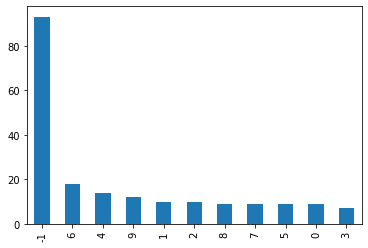

In [15]:
ClusterDF['ClusterID'].value_counts().plot(kind='bar')

### Cluster Plots
Below written functions get utilized to plot 2-Dimensional and 3-Dimensional cluster plots on the available set of features in the dataset. Plots include different available clusters along with cluster centroid.

In [16]:
def Plot2DCluster(X_Cols,df):
    for i in list(itertools.combinations(X_Cols, 2)):
        plt.rcParams["figure.figsize"] = (8,6)
        xi,yi=df.columns.get_loc(i[0]),df.columns.get_loc(i[1])
        for j in df['ClusterID'].unique():
            DFC=df[df.ClusterID==j]
            plt.scatter(DFC[i[0]],DFC[i[1]],cmap=plt.cm.Accent,label=j)
        plt.xlabel(i[0])
        plt.ylabel(i[1])
        plt.legend()
        plt.show()

def Plot3DCluster(X_Cols,df):
    for i in list(itertools.combinations(X_Cols, 3)):
        xi,yi,zi=df.columns.get_loc(i[0]),df.columns.get_loc(i[1]),df.columns.get_loc(i[2])
        fig,ax = plt.figure(figsize = (16, 10)),plt.axes(projection ="3d")
        ax.grid(b = True, color ='grey',linestyle ='-.',linewidth = 0.3,alpha = 0.2)
        for j in df['ClusterID'].unique():
            DFC=df[df.ClusterID==j]
            ax.scatter3D(DFC[i[0]],DFC[i[1]],DFC[i[2]],alpha = 0.8,cmap=plt.cm.Accent,label=j)
        ax.set_xlabel(i[0])
        ax.set_ylabel(i[1])
        ax.set_zlabel(i[2])
        plt.legend()
        plt.show()
    



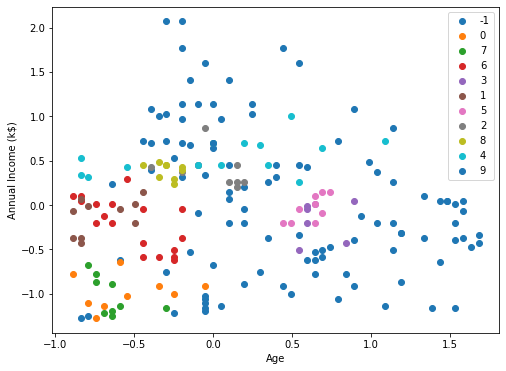

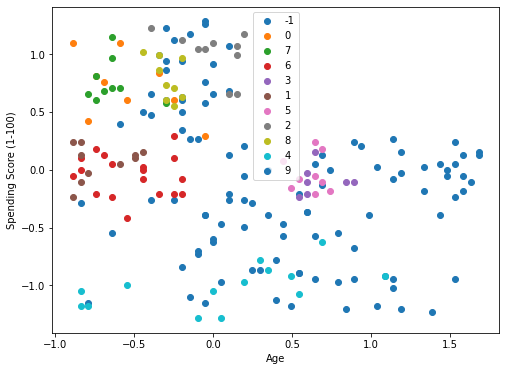

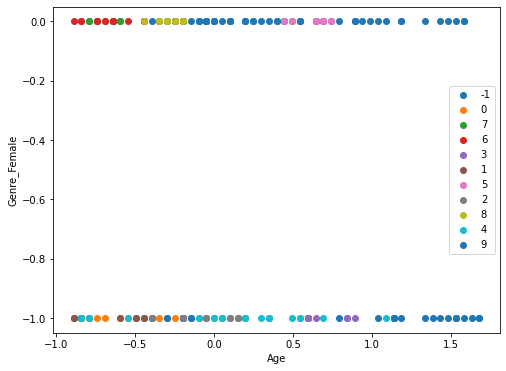

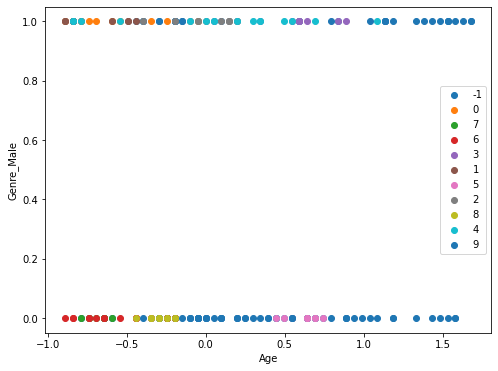

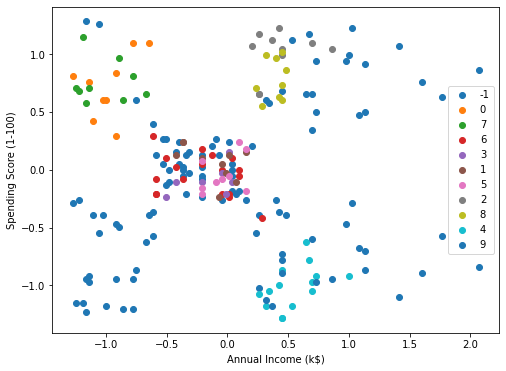

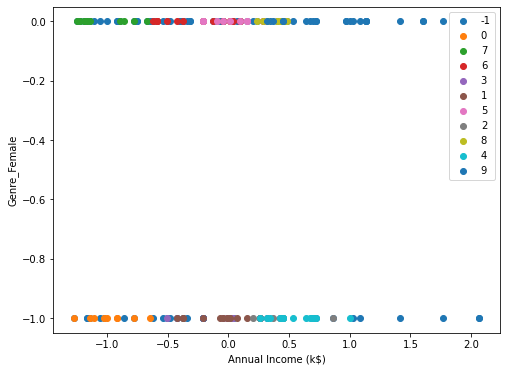

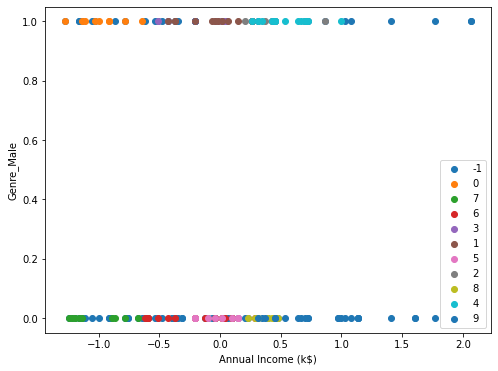

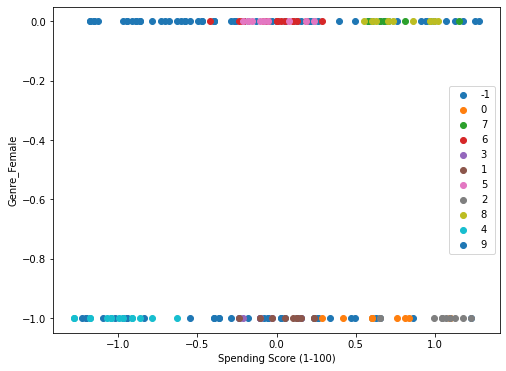

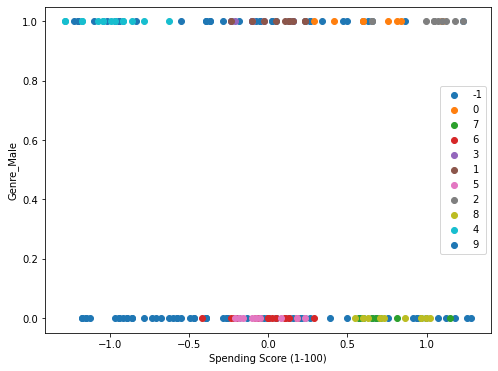

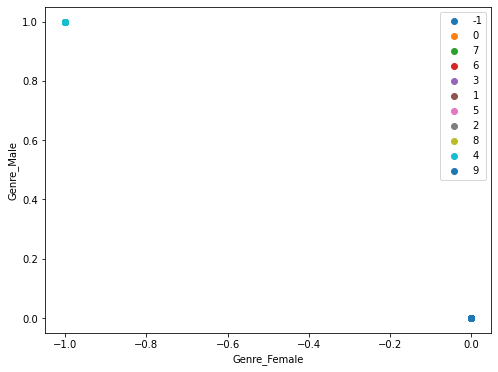

In [17]:
Plot2DCluster(X.columns,ClusterDF)

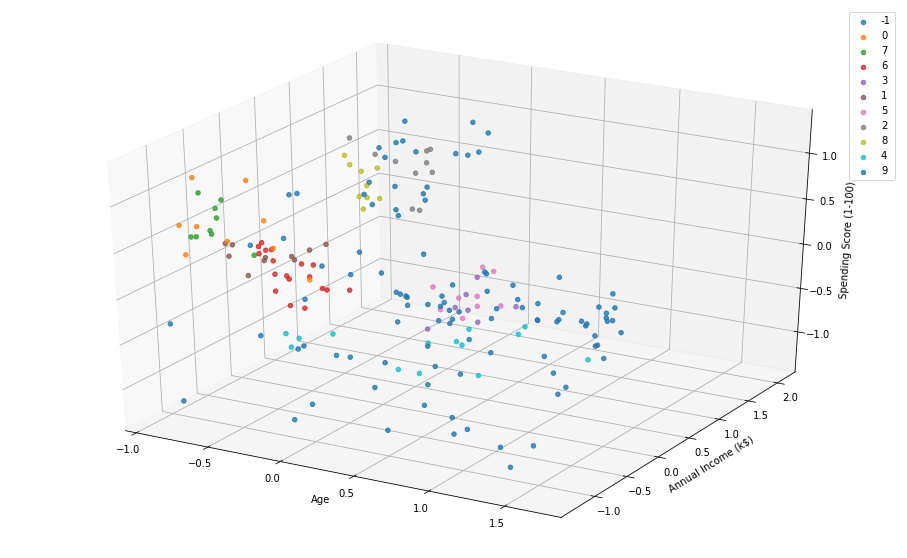

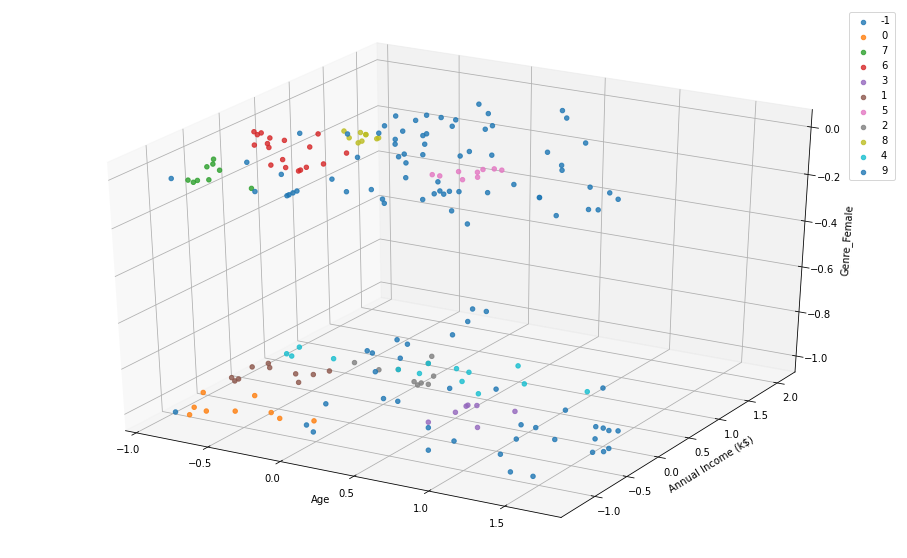

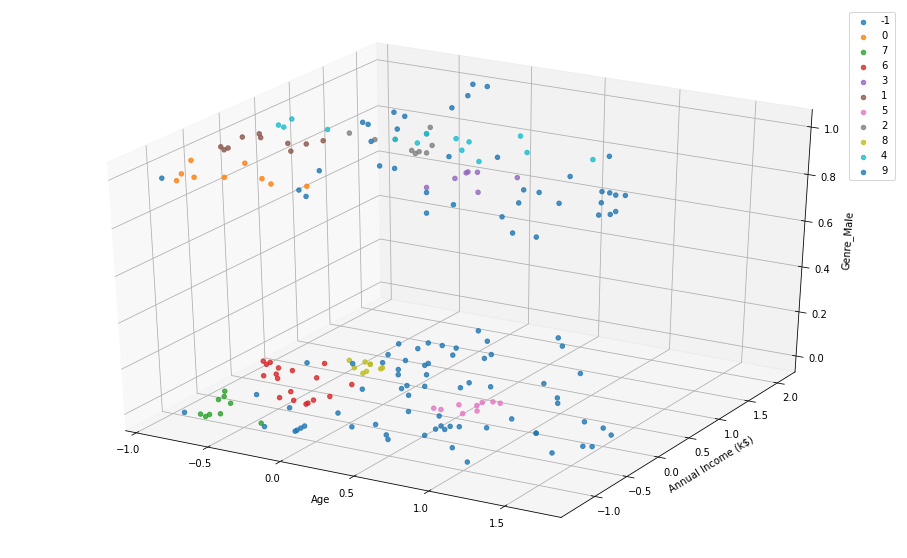

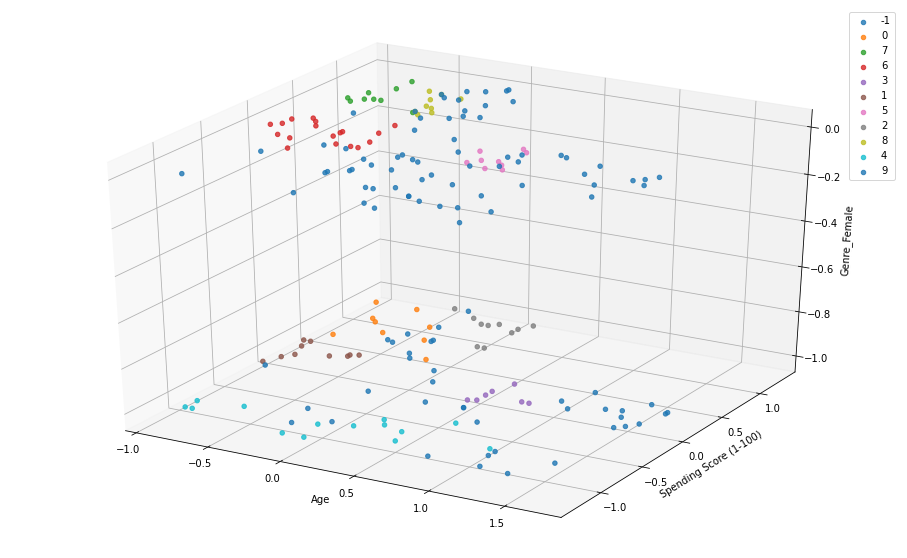

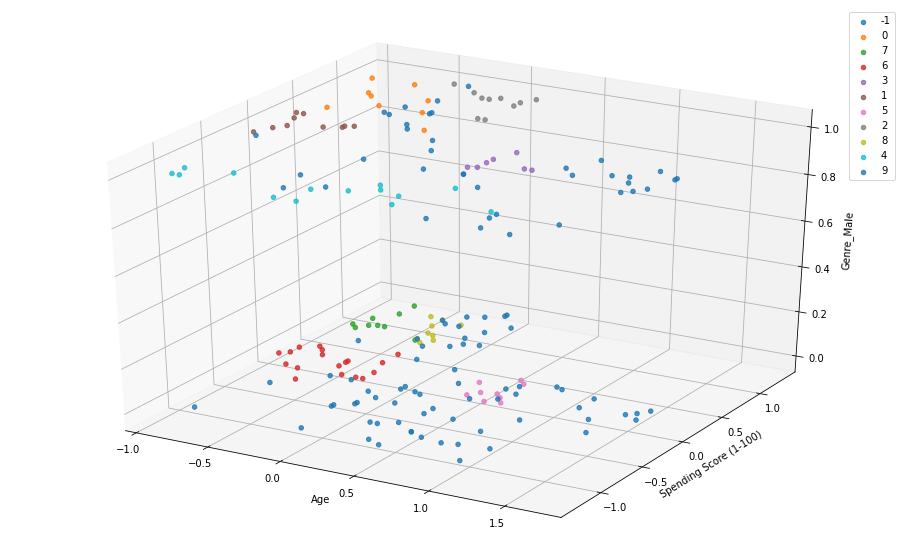

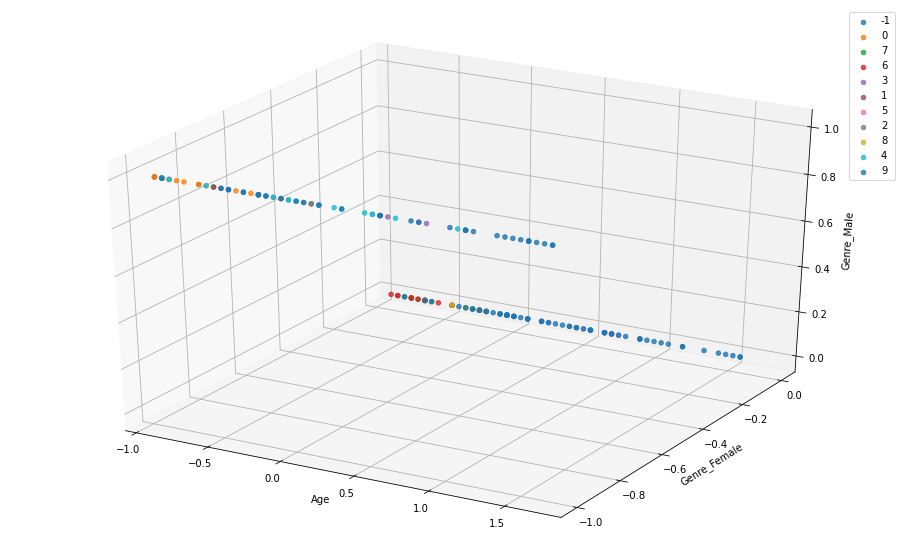

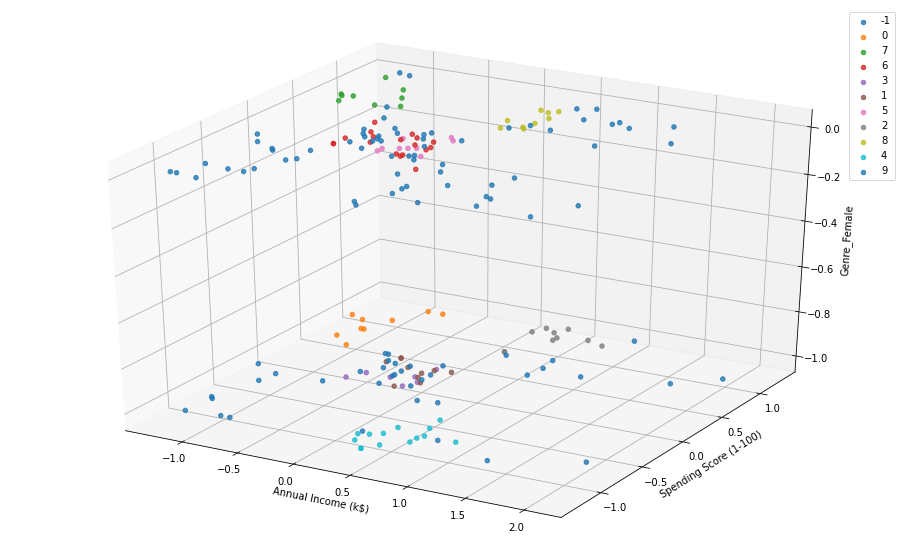

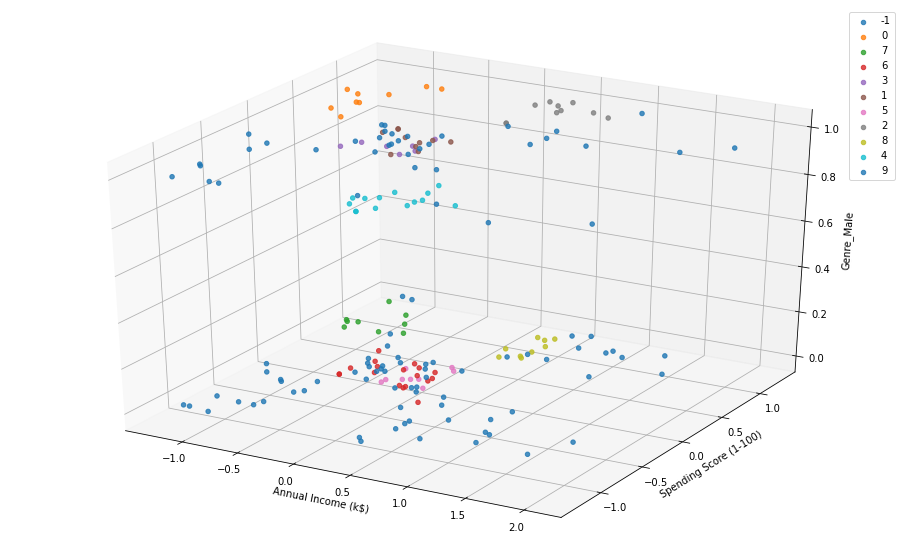

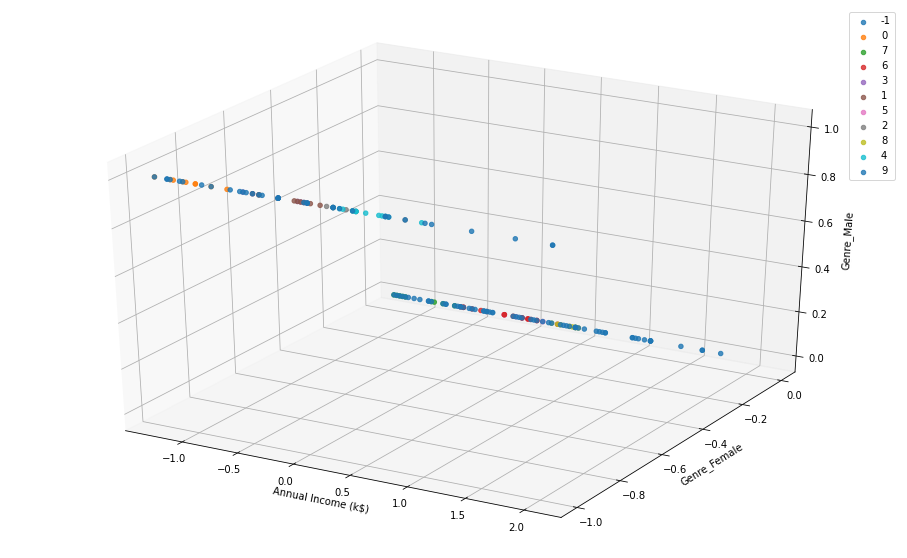

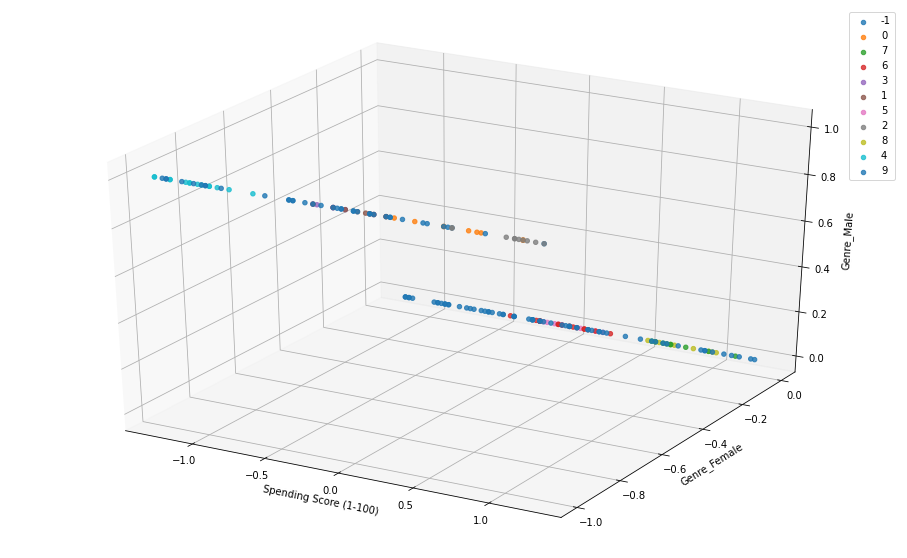

In [18]:
Plot3DCluster(X.columns,ClusterDF)

#### Creator: Vipin Kumar , Github: [Profile](https://github.com/devVipin01)